In [4]:
#It is just a start, i hope. I hope, I will have time for something more clever :-)
import os
import gc
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import lightgbm as lgb

print(os.getcwd())

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

/home/fran/Desktop/StudentPerformanceAnalysis
['student-merge.R', 'student-mat.csv', 'student-por.csv']


In [5]:
path       = 'input/' 
path_por = path + 'student-por.csv'
path_mat  =  path + 'student-mat.csv'

print('Loading the por data...')
por_data = pd.read_csv(path_por)
print('End loading por data...')
print('Loading the mat data...')
mat_data = pd.read_csv(path_mat)
print('End loading mat data...')
print('Merging data...')
data = [por_data,mat_data]
data = pd.concat(data)
print('End merging data...')

Loading the por data...
End loading por data...
Loading the mat data...
End loading mat data...
Merging data...
End merging data...


In [6]:
#Cleaning duplicates
data=data.drop_duplicates(["school",
                           "sex",
                           "age",
                           "address",
                           "famsize",
                           "Pstatus",
                           "Medu",
                           "Fedu",
                           "Mjob",
                           "Fjob",
                           "reason",
                           "nursery",
                           "internet"])

In [7]:
print(data.head(5))

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 394
Data columns (total 33 columns):
school        662 non-null object
sex           662 non-null object
age           662 non-null int64
address       662 non-null object
famsize       662 non-null object
Pstatus       662 non-null object
Medu          662 non-null int64
Fedu          662 non-null int64
Mjob          662 non-null object
Fjob          662 non-null object
reason        662 non-null object
guardian      662 non-null object
traveltime    662 non-null int64
studytime     662 non-null int64
failures      662 non-null int64
schoolsup     662 non-null object
famsup        662 non-null object
paid          662 non-null object
activities    662 non-null object
nursery       662 non-null object
higher        662 non-null object
internet      662 non-null object
romantic      662 non-null object
famrel        662 non-null int64
freetime      662 non-null int64
goout         662 non-null int64
Dalc          662 no

In [18]:
print(data.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  662.000000  662.000000  662.000000  662.000000  662.000000  662.000000   
mean    16.812689    2.492447    2.293051    1.566465    1.929003    0.259819   
std      1.269194    1.130958    1.094027    0.744699    0.826621    0.628750   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  662.000000  662.000000  662.000000  662.000000  662.000000  662.000000   
mean     3.941088    3.187311    3.173716    1.506042    2.287009    3.533233   
std      0.935679    1.0571

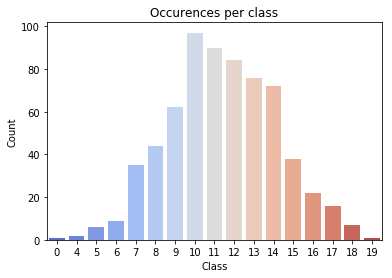

In [11]:
# Counts per class --> Is the dataset unbalanced?
counts = sns.countplot(x='G1', data=data, palette='coolwarm')
counts.set(xlabel='Class', ylabel='Count', title='Occurences per class')
plt.show()

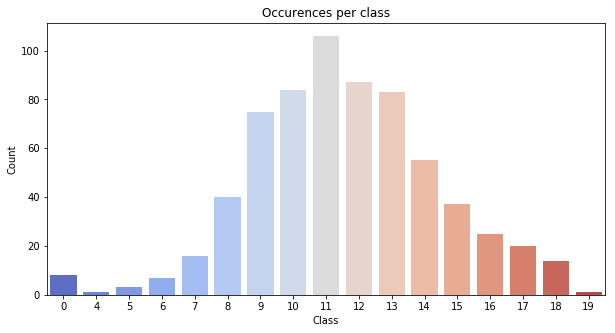

In [16]:
# Counts per class --> Is the dataset unbalanced?
counts = sns.countplot(x='G2', data=data, palette='coolwarm')
counts.set(xlabel='Class', ylabel='Count', title='Occurences per class')
plt.show()

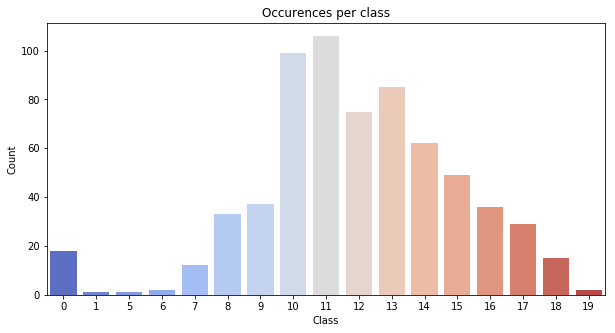

In [17]:
# Counts per class --> Is the dataset unbalanced?
counts = sns.countplot(x='G3', data=data, palette='coolwarm')
counts.set(xlabel='Class', ylabel='Count', title='Occurences per class')
plt.show()

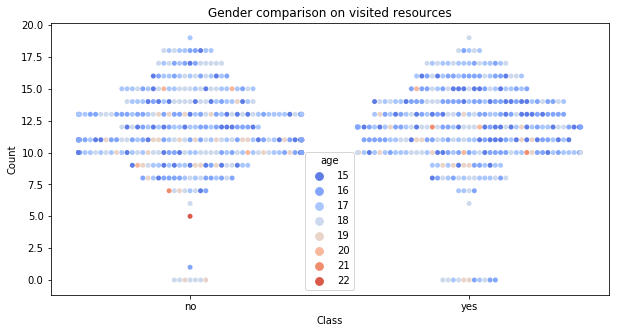

In [21]:
plot = sns.swarmplot(x='G3', y='G3', hue='age', 
              data=data, palette='coolwarm')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison on visited resources')
plt.rcParams['figure.figsize']=(10,5)
plt.show()